In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout
warnings.filterwarnings('ignore')
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional


SyntaxError: invalid syntax (2967326753.py, line 1)

In [ ]:
test =pd.read_csv('/content/Test_291021_ub (2).csv')
train = pd.read_csv('/content/train_291021 (2).csv')


In [ ]:
train_data = train.drop(['TIME IN GMT','TIME IN IST','Lat ','Long', 'Time','T','Date'], axis=1)
test_data = test.drop(['TIME IN GMT','TIME IN IST','Lat ','Long', 'Time','T','Date'], axis=1)


In [ ]:
train_data.dropna(axis=0, how='any', inplace=True)


In [ ]:
test_data.dropna(axis=0, how='any', inplace=True)
test_data.shape

(594, 8)

In [ ]:
n_time_steps = 104
n_features = 7 
step = 2
n_classes = 5 
n_epochs = 35      
batch_size = 64   
learning_rate = 0.0001
l2_loss = 0.0015

segments = []
labels = []



In [ ]:
for i in range(0,  train_data.shape[0]- n_time_steps, step):  

    Ax_tr = train_data['Ax'].values[i: i + n_time_steps]

    Ay_tr = train_data['Ay'].values[i: i + n_time_steps]

    Az_tr = train_data['Az'].values[i: i + n_time_steps]

    Gx_tr = train_data['Gx'].values[i: i + n_time_steps]

    Gy_tr = train_data['Gy'].values[i: i + n_time_steps]

    Gz_tr = train_data['Gz'].values[i: i + n_time_steps]

    Speed_tr = train_data['Speed'].values[i: i + n_time_steps]


    label_tr = stats.mode(train_data['Label'][i: i + n_time_steps])[0][0]

    segments.append([Ax_tr, Ay_tr, Az_tr, Gx_tr,Gy_tr,Gz_tr,Speed_tr])

    labels.append(label_tr)

In [ ]:
X_train = np.asarray(segments, dtype= np.float32).reshape(-1, n_time_steps, n_features)

y_train = np.asarray(pd.get_dummies(labels), dtype = np.float32)

X_train.shape

(1128, 104, 7)

In [ ]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, n_time_steps, n_features)

In [ ]:
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

reshaped_segments.shape

(1128, 104, 7)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.25)


In [ ]:
X_test.shape

(282, 104, 7)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout
from keras.layers import TimeDistributed

import os
from tensorflow.keras import Input
from tensorflow.keras.models import load_model, Model

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Lambda, Dot, Activation, Concatenate, Layer
# model = Sequential()
# # RNN layer
# model.add(LSTM(units = 100, input_shape = (X_train.shape[1], X_train.shape[2])))

# # Dropout layer
# model.add(Dropout(0.4))
 
# # Dense layer with ReLu
# model.add(Dense(units = 32, activation='tanh'))

# # Softmax layer
# model.add(Dense(y_train.shape[1], activation = 'softplus'))

# # Compile model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.summary()
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

model = Sequential()
x = model.add(Bidirectional(LSTM(50, return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Bidirectional(LSTM(100)))(x)
model.add(Dense(units = 64, activation='tanh'))
model.add(Dense(y_train.shape[1], activation = 'softplus'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 100)              23200     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 29,989
Trainable params: 29,989
Non-trainable params: 0
_________________________________________________________________


In [ ]:
total_params = 29989
model_size = total_params/1024**2
print('Size: {: .3f} MB'.format(model_size))

# model_size = 99589/(1024**2)
# model_size

Size:  0.029 MB


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout

In [ ]:
print(X_test.shape)
print(y_test.shape)

(282, 104, 7)
(282, 5)


In [ ]:
history = model.fit(X_train, y_train, epochs = n_epochs, validation_data = (X_test, y_test), batch_size = batch_size, verbose = 1)

#history = model.fit(X_train, y_train, epochs = n_epochs, validation_data = (X_test, y_test), batch_size = batch_size, verbose = 1)


Epoch 1/35
27/27 [==============================] - 6s 77ms/step - loss: 1.0013 - accuracy: 0.7175 - val_loss: 0.6685 - val_accuracy: 0.8404
Epoch 2/35
27/27 [==============================] - 1s 48ms/step - loss: 0.7261 - accuracy: 0.8038 - val_loss: 0.6119 - val_accuracy: 0.8404
Epoch 3/35
27/27 [==============================] - 1s 48ms/step - loss: 0.6907 - accuracy: 0.8038 - val_loss: 0.5766 - val_accuracy: 0.8475
Epoch 4/35
27/27 [==============================] - 1s 51ms/step - loss: 0.6214 - accuracy: 0.8144 - val_loss: 0.5066 - val_accuracy: 0.8617
Epoch 5/35
27/27 [==============================] - 2s 64ms/step - loss: 0.4780 - accuracy: 0.8416 - val_loss: 0.4013 - val_accuracy: 0.8865
Epoch 6/35
27/27 [==============================] - 2s 59ms/step - loss: 0.3470 - accuracy: 0.8842 - val_loss: 0.2888 - val_accuracy: 0.8759
Epoch 7/35
27/27 [==============================] - 4s 133ms/step - loss: 0.2727 - accuracy: 0.8889 - val_loss: 0.2713 - val_accuracy: 0.8759
Epoch 8/35
2

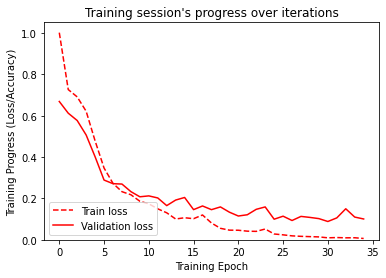

In [ ]:
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
# plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
# plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

9/9 [==============================] - 1s 12ms/step


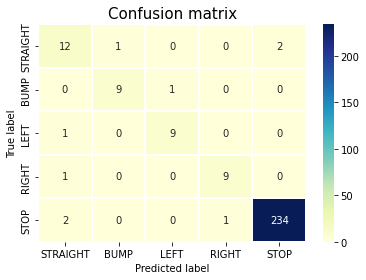

In [ ]:
import sklearn.metrics as metrics

predictions = model.predict(X_test)
class_labels = [ 'STRAIGHT', 'BUMP', 'LEFT',  'RIGHT','STOP']

max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

9/9 [==============================] - 0s 12ms/step


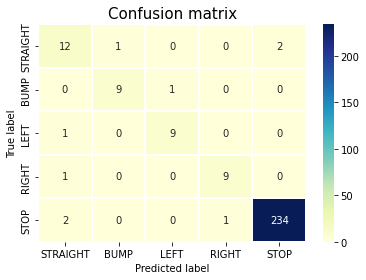

In [ ]:
import sklearn.metrics as metrics

predictions = model.predict(X_test)
class_labels = [ 'STRAIGHT', 'BUMP', 'LEFT',  'RIGHT','STOP']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

9/9 [==============================] - 0s 12ms/step - loss: 0.1006 - accuracy: 0.9681
Test Accuracy : 0.9680851101875305
Test Loss : 0.10064048320055008


9/9 [==============================] - 0s 12ms/step


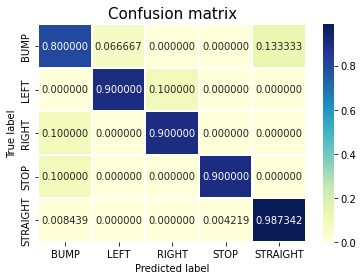

In [ ]:


import sklearn.metrics as metrics

predictions = model.predict(X_test)
class_labels = ['BUMP', 'LEFT',  'RIGHT','STOP', 'STRAIGHT']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
cmn = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='2f', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()